In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dark_horse = cv2.imread('DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) # OpenCV reads in images in BGR format by default so we need to convert to RGB to display in matplotlib 

rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

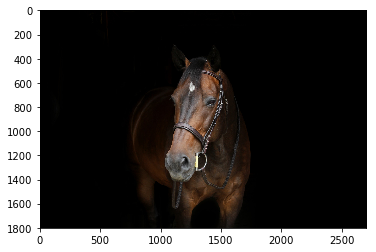

In [4]:
plt.imshow(show_horse)

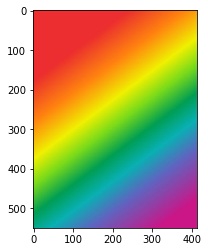

In [5]:
plt.imshow(show_rainbow)

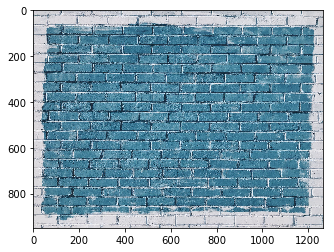

In [6]:
plt.imshow(show_bricks)

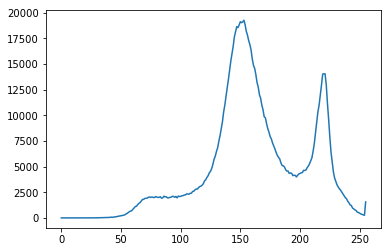

In [7]:
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # 0 is the blue channel of the image 
plt.plot(hist_values)

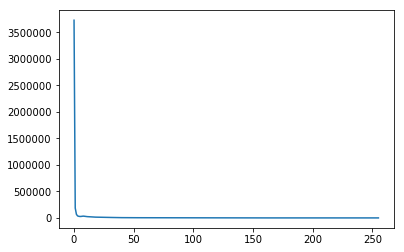

In [8]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # 0 is the blue channel of the image
plt.plot(hist_values)

Text(0.5,1,'Histogram for Blue Bricks Image')

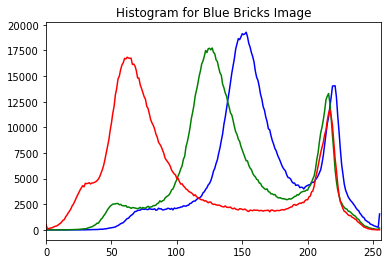

In [9]:
img = blue_bricks
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    hist_values = cv2.calcHist([img], channels=[i], mask=None, histSize=[256], ranges=[0,256]) # calculate the histogram for each color channel
    plt.plot(hist_values, color=col) # plot the histogram for each color channel
    plt.xlim([0,256]) # x-axis limit is from 0 to 256

plt.title('Histogram for Blue Bricks Image')

## HISTOGRAM EQUALIZATION

In [10]:
img = rainbow
img.shape

(550, 413, 3)

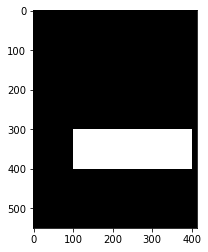

In [11]:
mask = np.zeros(img.shape[:2], np.uint8) # create a mask of the same size as the image 
mask[300:400, 100:400] = 255 # create a white rectangle in the mask
plt.imshow(mask, cmap='gray')

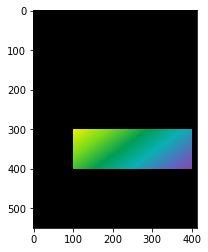

In [12]:
masked_img = cv2.bitwise_and(img, img, mask=mask) # apply the mask to the image
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask) # apply the mask to the image in RGB format for visualization
plt.imshow(show_masked_img)

In [13]:
hist_mask_values = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256]) # calculate the histogram for the red channel of the image with the mask applied

In [14]:
hist_values = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0,256]) # calculate the histogram for the red channel of the image with the mask applied

Text(0.5,1,'Histogram for Rainbow Image Red Channel with Mask')

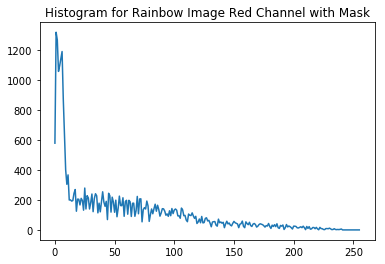

In [16]:
# plt.plot(hist_values)
plt.plot(hist_mask_values)
plt.title('Histogram for Rainbow Image Red Channel with Mask')